In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as mp

In [2]:
test_data='D://LP-4-DL-DataSet//mnist-jpg//mnist-jpg//test'
train_data='D://LP-4-DL-DataSet//mnist-jpg//mnist-jpg//train'

In [12]:
load = ImageDataGenerator(rescale=1.0/255)

test_generator=load.flow_from_directory(
    test_data,
    target_size=(28,28),
    batch_size=2000,
    shuffle=True,
    class_mode='categorical',
    color_mode='grayscale'
    
)
train_generator=load.flow_from_directory(
    train_data,
     target_size=(28,28),
    class_mode='categorical',
    batch_size=10000,
    shuffle=True,
     color_mode='grayscale'
    
    
    
)

Found 10000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.


In [14]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()
len(model.weights)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4

In [26]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.8404 - val_loss: 0.5374 - val_accuracy: 0.8725
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.8670 - val_loss: 0.4397 - val_accuracy: 0.8910
Epoch 3/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8814 - val_loss: 0.3878 - val_accuracy: 0.8985
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8918 - val_loss: 0.3570 - val_accuracy: 0.9065
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8956 - val_loss: 0.3345 - val_accuracy: 0.9160
Epoch 6/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.9007 - val_loss: 0.3164 - val_accuracy: 0.9185
Epoch 7/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.9033 - val_loss: 0.3022 - val_accuracy: 0.9215
Epoch 

In [27]:
loss,accuracy=model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 924us/step - loss: 0.2774 - accuracy: 0.9260


In [28]:
print('Loss:',loss)
print('Accuracy:',accuracy)

Loss: 0.2773827314376831
Accuracy: 0.9259999990463257


63/63 [==============================] - 0s 904us/step
[1.04870560e-04 1.37455845e-05 3.17718339e-04 2.13900625e-04
 9.64691401e-01 6.06191671e-03 1.68598990e-03 5.63428446e-04
 6.16053771e-03 2.01864876e-02]
A 4
P 4


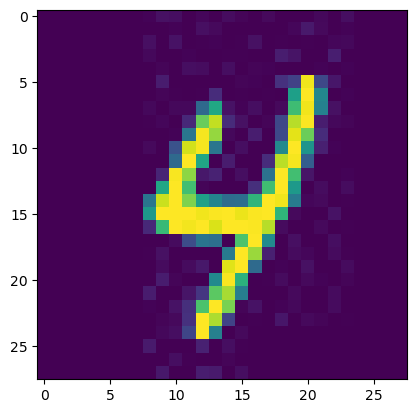

In [48]:
n=10
plt.imshow(x_test[n])
predict_value=model.predict(x_test)
print(predict_value[n])
print('A',mp.argmax(y_test[n]))
print('P',mp.argmax(predict_value[n]))

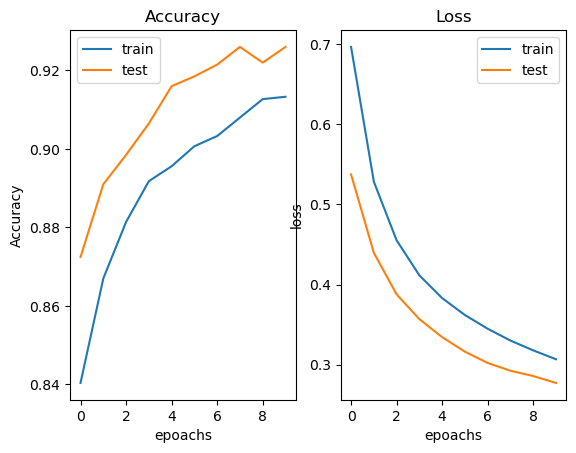

In [46]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoachs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoachs')
plt.ylabel('loss')
plt.legend(['train','test'])